<a href="https://colab.research.google.com/github/PriyanshuSaxena9/DSDL-2022/blob/main/Classification_Model_!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [81]:
heart=pd.read_csv('/content/heart.csv')

In [82]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [83]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [84]:
heart[['Age']].value_counts

<bound method DataFrame.value_counts of      Age
0     40
1     49
2     37
3     48
4     54
..   ...
913   45
914   68
915   57
916   57
917   38

[918 rows x 1 columns]>

In [85]:
heart[['Sex']].value_counts

<bound method DataFrame.value_counts of     Sex
0     M
1     F
2     M
3     F
4     M
..   ..
913   M
914   M
915   M
916   F
917   M

[918 rows x 1 columns]>

In [86]:
heart[['ChestPainType']].value_counts

<bound method DataFrame.value_counts of     ChestPainType
0             ATA
1             NAP
2             ATA
3             ASY
4             NAP
..            ...
913            TA
914           ASY
915           ASY
916           ATA
917           NAP

[918 rows x 1 columns]>

In [87]:
heart[['RestingBP']].value_counts

<bound method DataFrame.value_counts of      RestingBP
0          140
1          160
2          130
3          138
4          150
..         ...
913        110
914        144
915        130
916        130
917        138

[918 rows x 1 columns]>

In [88]:
heart[['Cholesterol']].value_counts

<bound method DataFrame.value_counts of      Cholesterol
0            289
1            180
2            283
3            214
4            195
..           ...
913          264
914          193
915          131
916          236
917          175

[918 rows x 1 columns]>

In [ ]:
heart[['RestingECG']].value_counts

In [ ]:
heart[['MaxHR']].value_counts

In [ ]:
heart[['ExerciseAngina']].value_counts

In [ ]:
heart[['Oldpeak']].value_counts

In [ ]:
heart[['ST_Slope']].value_counts

In [ ]:
heart[['HeartDisease']].value_counts

In [89]:
heart = pd.read_csv('heart.csv')
heart['HeartDisease'].astype(float)

     

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
913    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: HeartDisease, Length: 918, dtype: float64

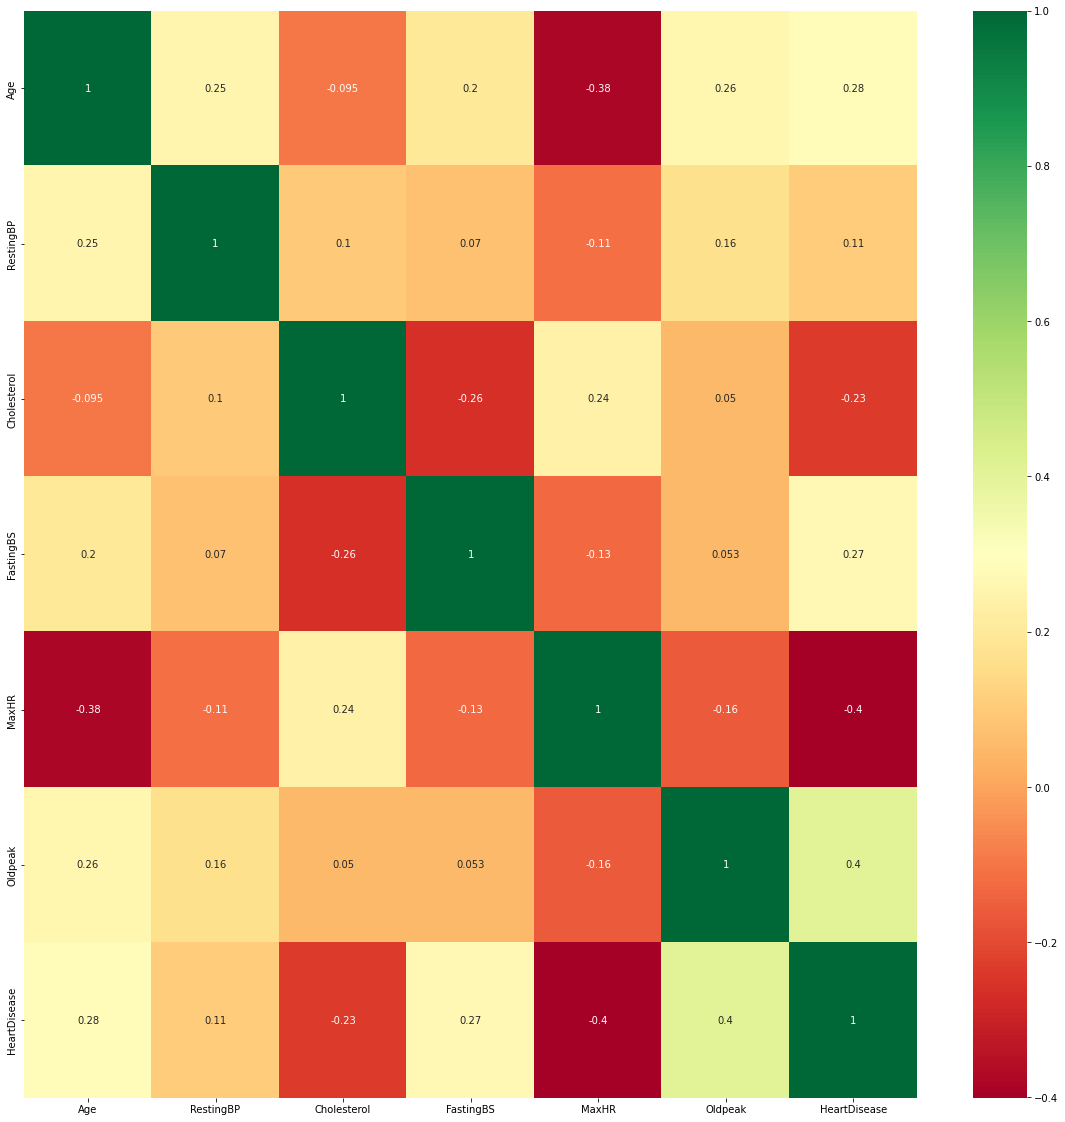

In [90]:
corrmat = heart.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(heart[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a1e783070>,
      dtype=object)

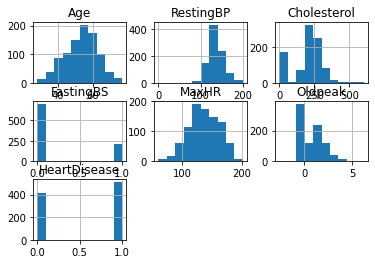

In [43]:
heart.hist()

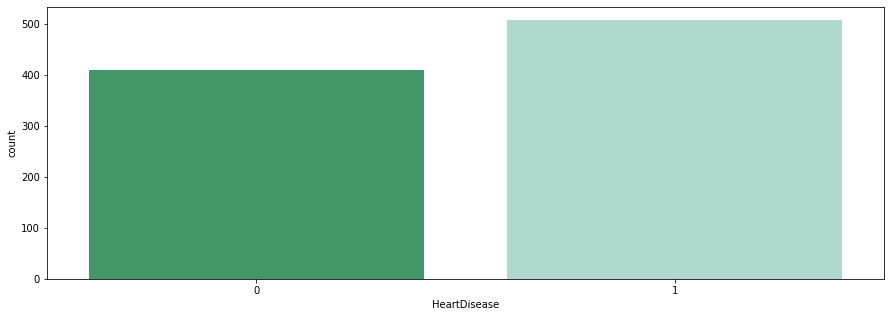

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(x='HeartDisease',data=heart,palette='BuGn_r')
     

In [92]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [93]:
heart = pd.get_dummies(heart, columns = ['Sex','ExerciseAngina','RestingECG','ST_Slope','ChestPainType'])

In [94]:
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
     

In [95]:
Label_Encoder= LabelEncoder()
heart['HeartDisease'] = Label_Encoder.fit_transform(heart['HeartDisease'])
     

In [96]:
X=heart.drop('HeartDisease',axis= 1)
Y = heart['HeartDisease']

In [97]:
y=heart[['HeartDisease']]

In [98]:
x=heart[['Oldpeak','RestingBP','Cholesterol','MaxHR','HeartDisease']]
     


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3)

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
from sklearn.model_selection import cross_val_score

accuracy_rate=[]

for i in range(1,40):
    classifier= KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(classifier,X,Y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy_Rate')

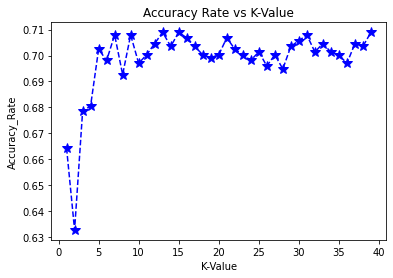

In [102]:
plt.plot(range(1,40),accuracy_rate, color= 'blue',linestyle = 'dashed',marker='*', markersize=10)
plt.title('Accuracy Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy_Rate')